In [133]:
# Data wrangling:
import numpy as np
import pandas as pd

# Data Visualization:
import seaborn as sns
from DataVisualization import DataVisualization
from yellowbrick.regressor import (
    residuals_plot,
    prediction_error
)

# Pipelines:
from sklearn.pipeline import (
    Pipeline,
    make_pipeline
)
from sklearn.compose import (
    make_column_selector as selector,
    ColumnTransformer,
)

# Seleção e validação dos modelos:
from sklearn import metrics
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)

# Pre-processing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
)

# Modelos:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import (
    LinearRegression, 
    LogisticRegression,
    LassoCV,
    RidgeCV,
)
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
)

# Deployment:
import pickle

# Config:
from sklearn import set_config
set_config(transform_output='pandas')

## DataFrame:

In [134]:
path = r'../data/insurance.csv'
df = pd.read_csv(
    filepath_or_buffer=path,
    decimal='.',
    sep=','
)

In [135]:
display(df.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Código:

In [136]:
class HealthInsurance(DataVisualization):
    def get_metrics(self, y_true, y_pred):
        dict_metrics = {
            'R2': metrics.r2_score(y_true=y_true, y_pred=y_pred),
            'MAE': metrics.mean_absolute_error(y_true=y_true, y_pred=y_pred),
            'MAPE': metrics.mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred),
            'RMSE': np.sqrt(metrics.mean_squared_error(y_true=y_true, y_pred=y_pred)),
        }
        return dict_metrics

if __name__ == '__main__':
    health_insurance = HealthInsurance()

## Output:

### Data Understanding:

In [137]:
display(df.head(3))

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [138]:
display(df.tail(3))

,age,sex,bmi,children,smoker,region,charges
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [139]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [140]:
health_insurance.verificando_as_dimensões_do_dataframe(
    dataframe=df
)

Linhas: 1338 
Colunas: 7


In [141]:
health_insurance.descrição(
    dataframe=df,
    vertical=True
)

,count,mean,std,min,10%,15%,25%,50%,75%,85%,95%,99%,max
age,1338.0,39.21,14.05,18.00,19.00,22.00,27.00,39.00,51.00,56.00,62.00,64.00,64.00
bmi,1338.0,30.66,6.10,15.96,22.99,24.27,26.30,30.40,34.69,37.05,41.11,46.41,53.13
children,1338.0,1.09,1.21,0.00,0.00,0.00,0.00,1.00,2.00,2.00,3.00,5.00,5.00
charges,1338.0,13270.42,12110.01,1121.87,2346.53,3171.84,4740.29,9382.03,16639.91,24990.17,41181.83,48537.48,63770.43


In [142]:
health_insurance.descrição_object(
    dataframe=df,
    vertical=True
)

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [143]:
health_insurance.verificando_tipos(
    dataframe=df
)

,Tipos
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [144]:
health_insurance.verificando_valores_nulos(
    dataframe=df
)

,Quantidade,Porcentagem
age,0,0.00%
sex,0,0.00%
bmi,0,0.00%
children,0,0.00%
smoker,0,0.00%
region,0,0.00%
charges,0,0.00%


In [145]:
health_insurance.verificando_valores_duplicados(
    dataframe=df
)

,Quantidade,Porcentagem
age,1291,96.49%
sex,1336,99.85%
bmi,790,59.04%
children,1332,99.55%
smoker,1336,99.85%
region,1334,99.70%
charges,1,0.07%


In [146]:
colunas = ['sex', 'smoker', 'region',]

In [147]:
for coluna in colunas:
    print(f'{coluna}:')
    result = health_insurance.frequencia_da_repetição_dos_valores(
        dataframe=df,
        coluna=coluna
    )
    display(result)

sex:


,sex,count
0,male,676
1,female,662


smoker:


,smoker,count
0,no,1064
1,yes,274


region:


,region,count
0,southeast,364
1,southwest,325
2,northwest,325
3,northeast,324


### Data Visualization:

**Gasto com saúde por idade:**

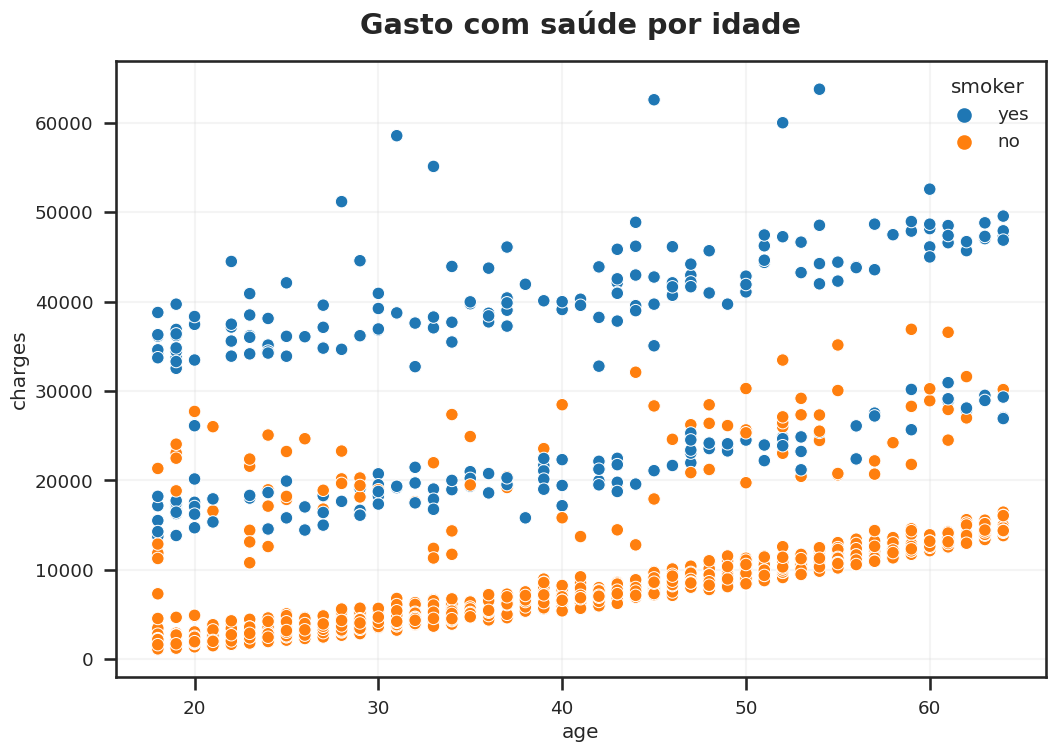

In [148]:
health_insurance.gráfico_scatterplot(
    dataframe=df,
    x='age',
    y='charges',
    hue='smoker',
    titulo='Gasto com saúde por idade'
)

**Gasto com saúde por BMI:**

BMI significa Índice de Massa Corporal, em inglês "Body Mass Index". É uma medida usada para avaliar se uma pessoa possui um peso saudável em relação à sua altura. O cálculo do BMI é relativamente simples e é amplamente utilizado como uma ferramenta de triagem para avaliar o risco potencial para a saúde associado ao peso corporal.

O cálculo do BMI é feito dividindo o peso da pessoa (em quilogramas) pelo quadrado da sua altura (em metros). A fórmula é a seguinte:

BMI = peso (kg) / altura² (m²)

De acordo com as categorias padrão estabelecidas pela Organização Mundial da Saúde (OMS), os resultados do BMI são interpretados da seguinte forma:

- Abaixo de 18,5: Abaixo do peso
- 18,5 a 24,9: Peso saudável
- 25 a 29,9: Sobrepeso
- 30 a 34,9: Obesidade grau 1
- 35 a 39,9: Obesidade grau 2
- 40 ou mais: Obesidade grau 3 (obesidade mórbida)

É importante ressaltar que o BMI é uma medida simples e rápida de ser calculada, mas não é uma avaliação completa da saúde de uma pessoa. Outros fatores, como composição corporal, distribuição de gordura, massa muscular e saúde geral, também devem ser levados em consideração ao avaliar a saúde e o risco de doenças relacionadas ao peso corporal. Sempre é recomendado buscar orientação médica para uma avaliação mais detalhada e personalizada.


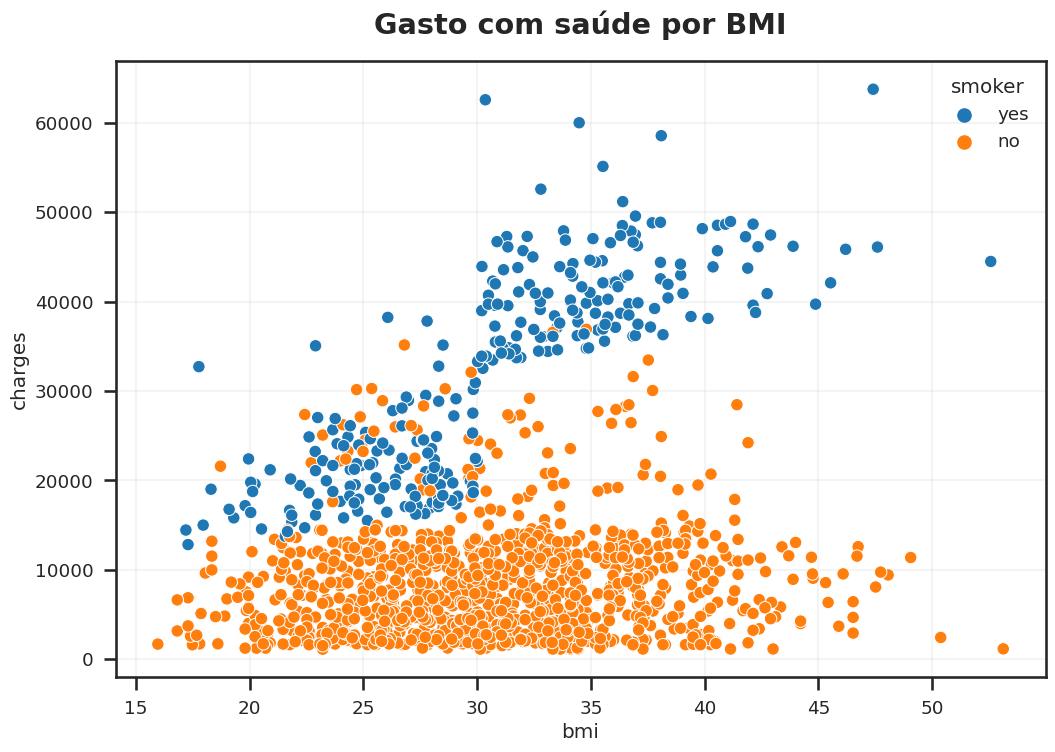

In [149]:
health_insurance.gráfico_scatterplot(
    dataframe=df,
    x='bmi',
    y='charges',
    hue='smoker',
    titulo='Gasto com saúde por BMI'
)

**Filhos:**

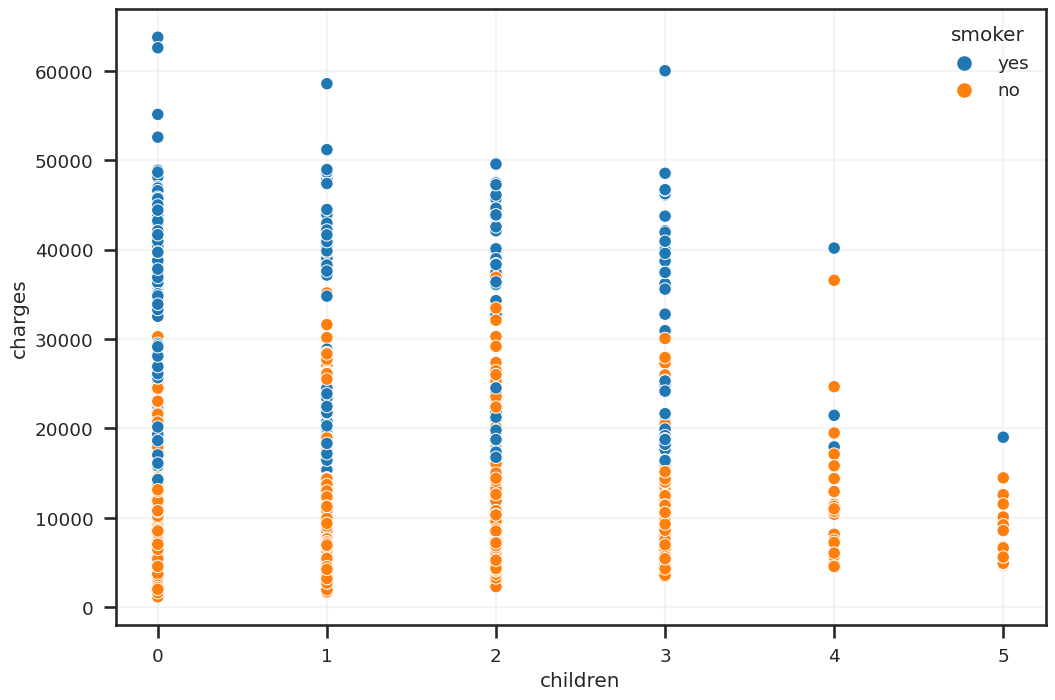

In [150]:
health_insurance.gráfico_scatterplot(
    dataframe=df,
    x='children',
    y='charges',
    hue='smoker',
    titulo=''
)

**Identificando outliers:**

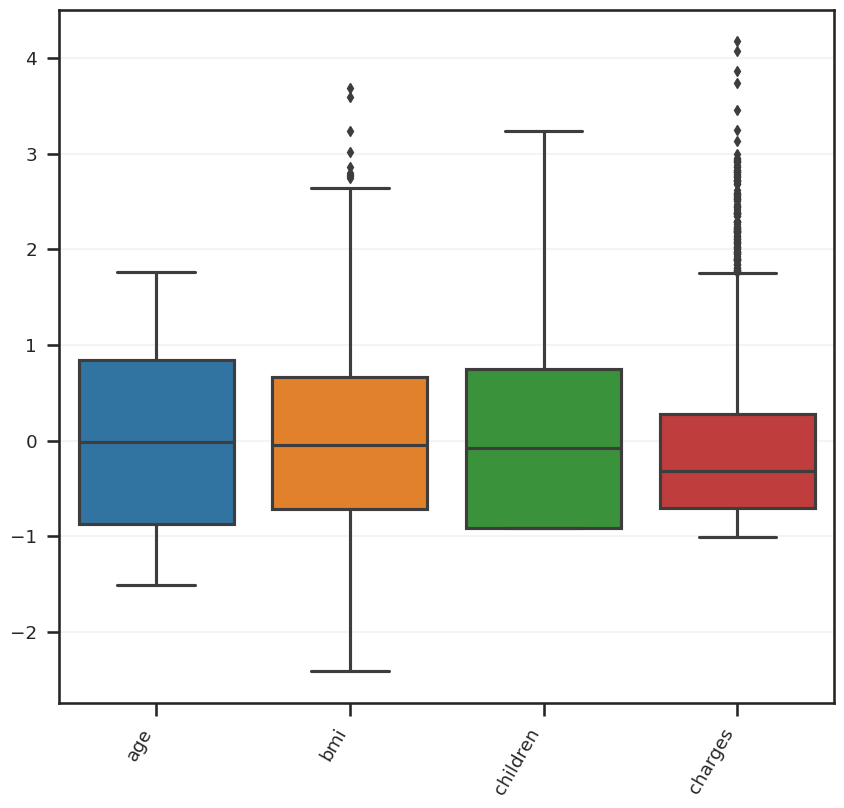

In [151]:
health_insurance.gráfico_boxplot(
    dataframe=df,
    figsize=(10, 9)
)

**Identificando outliers por variável:**

sex:


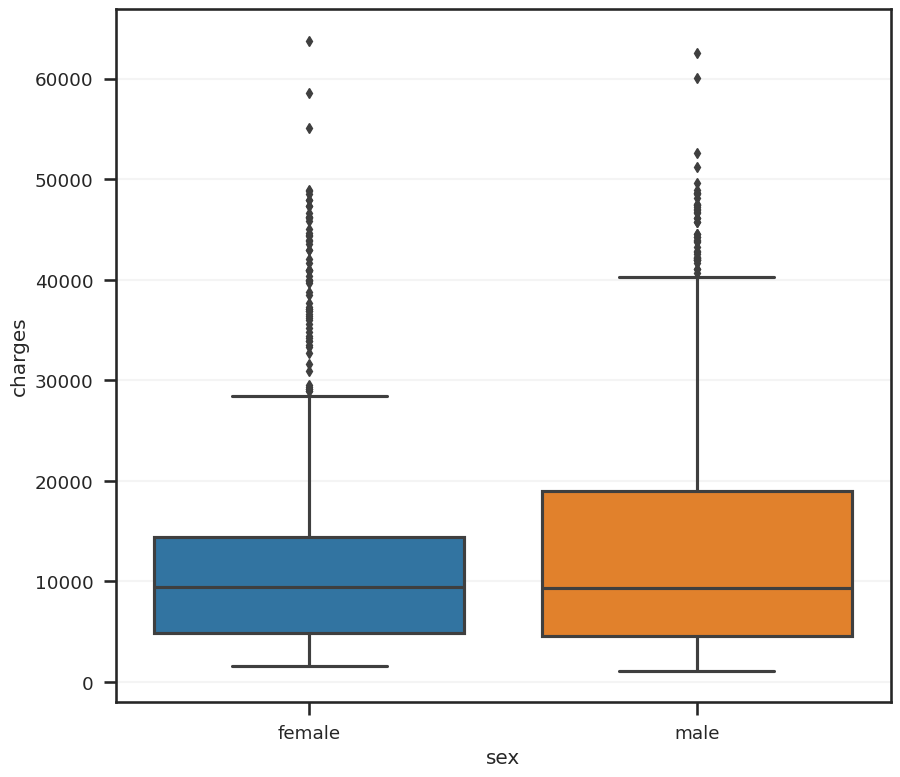

smoker:


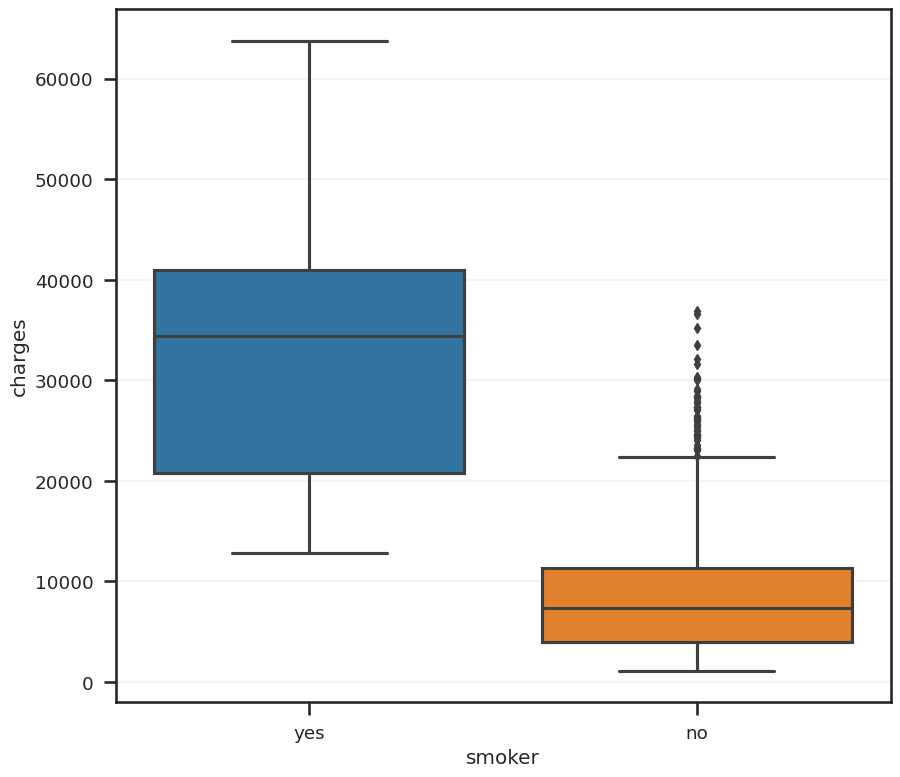

region:


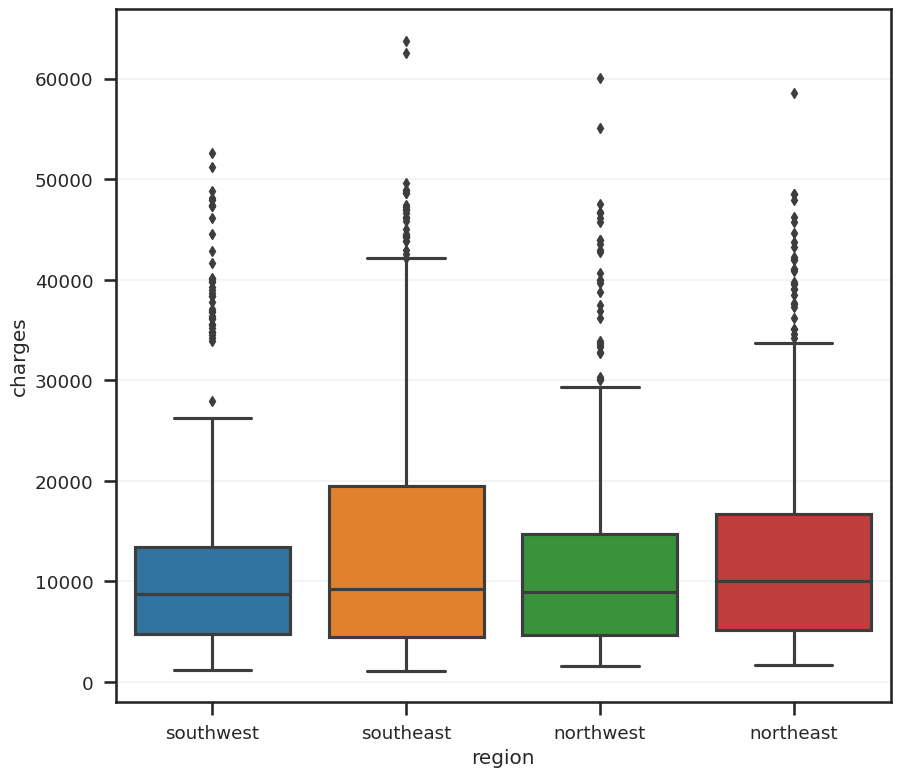

In [152]:
for coluna in colunas:
    print(f'{coluna}:')
    health_insurance.gráfico_boxplot_para_comparação_variáveis(
        dataframe=df, 
        x=coluna, 
        y='charges',
        figsize=(10, 9)
    )

**Gráfico de calor:**

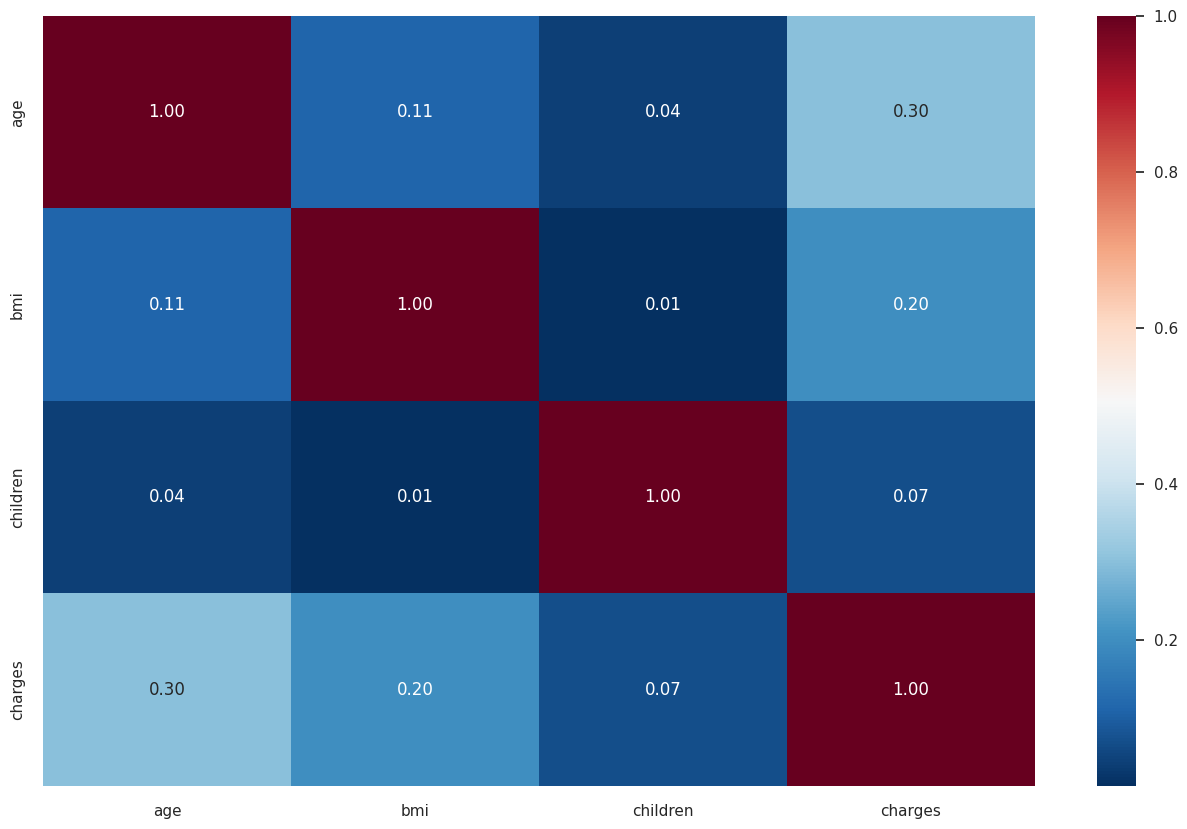

In [153]:
health_insurance.gráfico_heatmap(
    dataframe=df[['age', 'bmi', 'children', 'charges']]
)

### Data Preparetion:

In [154]:
NUMERICAL_FEATURES = ['age', 'bmi', 'children']
CATEGORICAL_FEATURES = ['smoker'] #['sex', 'smoker', 'region']
FEATURES = NUMERICAL_FEATURES + CATEGORICAL_FEATURES
TARGET = 'charges'

#### Seed:

In [155]:
seed = 69

#### Separating x and y:

In [156]:
x = df[FEATURES]
y = df[TARGET]

#### Train-test Split:

In [157]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    random_state=seed
)

#### Pre-processing:

##### Tratando Nulos:

In [158]:
numeric_processor = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(), 
)
categorical_processor  = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False), 

)

##### Pipeline de pre-processig:

In [159]:
pre_processing = ColumnTransformer([
    (
        'one', 
        categorical_processor,
        CATEGORICAL_FEATURES
    ),
    (
        'Scaler', 
        numeric_processor, 
        NUMERICAL_FEATURES
    ),
])

#### Testando Pre-processing:

In [160]:
df_test = x
pre_processing.fit_transform(df_test)

,one__smoker_yes,Scaler__age,Scaler__bmi,Scaler__children
0,1.0,-1.438764,-0.453320,-0.908614
1,0.0,-1.509965,0.509621,-0.078767
2,0.0,-0.797954,0.383307,1.580926
3,0.0,-0.441948,-1.305531,-0.908614
4,0.0,-0.513149,-0.292556,-0.908614
...,...,...,...,...
1333,0.0,0.768473,0.050297,1.580926
1334,0.0,-1.509965,0.206139,-0.908614
1335,0.0,-1.509965,1.014878,-0.908614
1336,0.0,-1.296362,-0.797813,-0.908614


### Modeling:

#### Pipeline:

In [161]:
pipeline = Pipeline([
    ('pre_processing', pre_processing),
    ('model', LinearRegression()),
])

#### GridSearchCV:

##### Modelos:

In [162]:
params = {
    'model' : [
        DummyRegressor(),
        LinearRegression(),
        LogisticRegression(random_state=seed),
        GradientBoostingRegressor(random_state=seed),
        RandomForestRegressor(random_state=seed),
        LassoCV(),
        RidgeCV(),
    ]
}

##### Buscando os melhores modelos:

In [163]:
grid_model = GridSearchCV(
    pipeline, params, cv=5, scoring='r2', verbose=1
)
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/home/guerrlr0/Documentos/010101110101/Programação/Projetos/Python/Health_Insurance/core/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 35.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/guerrlr0/Documentos/010101110101/Programação/Projetos/Python/Health_Insurance/core/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/guerrlr0/Documentos/010101110101/Programação/Projetos/Python/Health_Insurance/core/.venv/lib/python3.10/site-packages/sklearn/base.py", 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processing',
                                        ColumnTransformer(transformers=[('one',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['smoker']),
                                                                        ('Scaler',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children'])])),
                                       ('model', LinearRegression())]),
             param_grid={'model': [DummyRegressor(), LinearRegression(),
                                   LogisticRegression(random_state=69),
                                   GradientBoostingRegressor(random_state=69),
                                   RandomForestRegressor(random_state=69),
                                   LassoCV(), RidgeCV()]},
             scoring='r2', verbose=1)

##### GridSearchCV resultados:

In [164]:
df_grid_cv_result = (
    pd.DataFrame(grid_model.cv_results_)
    .set_index('rank_test_score')
    .sort_index()
)
display(df_grid_cv_result.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,
1,0.085167,0.003289,0.008257,0.000765,GradientBoostingRegressor(random_state=69),{'model': GradientBoostingRegressor(random_sta...,0.866216,0.851841,0.813998,0.886399,0.839544,0.851600,0.024429
2,0.201589,0.021421,0.013968,0.000812,RandomForestRegressor(random_state=69),{'model': RandomForestRegressor(random_state=69)},0.844367,0.847908,0.791558,0.869878,0.804339,0.831610,0.029123
3,0.068192,0.001214,0.007862,0.000352,LassoCV(),{'model': LassoCV()},0.736546,0.752533,0.678951,0.785794,0.759993,0.742763,0.035650
4,0.014516,0.000471,0.007473,0.000289,RidgeCV(),{'model': RidgeCV()},0.736556,0.752562,0.678914,0.785814,0.759965,0.742762,0.035667
5,0.017042,0.001037,0.009274,0.000476,LinearRegression(),{'model': LinearRegression()},0.736493,0.752634,0.678828,0.785832,0.760008,0.742759,0.035712


##### Melhor Modelo:

In [165]:
grid_model.best_estimator_

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('one',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['smoker']),
                                                 ('Scaler',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('model', GradientBoostingRegressor(random_state=69))])

#### Otimização o GradientBoostingRegressor:

##### Pipeline:

In [166]:
pipeline = Pipeline([
    ('pre_processing', pre_processing),
    ('model', GradientBoostingRegressor()),
])

##### Parâmetros:

In [167]:
params = {
    'model__learning_rate': [.1, .01],
    'model__max_depth': [3, 4, 5],
    'model__n_estimators': [300, 400, 500],
    'model__subsample': [1., .8]
}

##### Modelo Tunado:

In [168]:
grid_model = GridSearchCV(
    pipeline, params, cv=5, scoring='r2', n_jobs=-1, verbose=1
)
grid_model.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pre_processing',
                                        ColumnTransformer(transformers=[('one',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['smoker']),
                                                                        ('Scaler',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children'])])),
                                       ('model', GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1, 0.01],
                         'model__max_depth': [3, 4, 5],
                         'model__n_estimators': [300, 400, 500],
                         'model__subsample': [1.0, 0.8]},
             scoring='r2', verbose=1)

##### Resultado:

In [169]:
df_grid_cv_result = (
    pd.DataFrame(grid_model.cv_results_)
    .set_index('rank_test_score')
    .sort_index()
)
display(df_grid_cv_result.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,,,,,
1,0.554900,0.024119,0.015707,0.000544,0.01,3,400,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.875706,0.858177,0.830753,0.901924,0.852932,0.863898,0.023820
2,0.660741,0.024240,0.015606,0.000690,0.01,3,500,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.876892,0.858120,0.828911,0.903669,0.851663,0.863851,0.025130
3,0.527180,0.018673,0.015578,0.000761,0.01,3,400,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.874746,0.858151,0.830542,0.902273,0.851099,0.863362,0.024076
4,0.637633,0.011284,0.015294,0.000406,0.01,3,500,1.0,"{'model__learning_rate': 0.01, 'model__max_dep...",0.876012,0.858586,0.829561,0.901581,0.848010,0.862750,0.024576
5,0.417588,0.008012,0.014919,0.000461,0.01,3,300,0.8,"{'model__learning_rate': 0.01, 'model__max_dep...",0.871556,0.855853,0.830172,0.901440,0.852885,0.862381,0.023580


##### Separando o melhor modelo:

In [170]:
pipeline = grid_model.best_estimator_

### Data Visualization:

#### Visualizando as features mais importantes:

<Axes: >

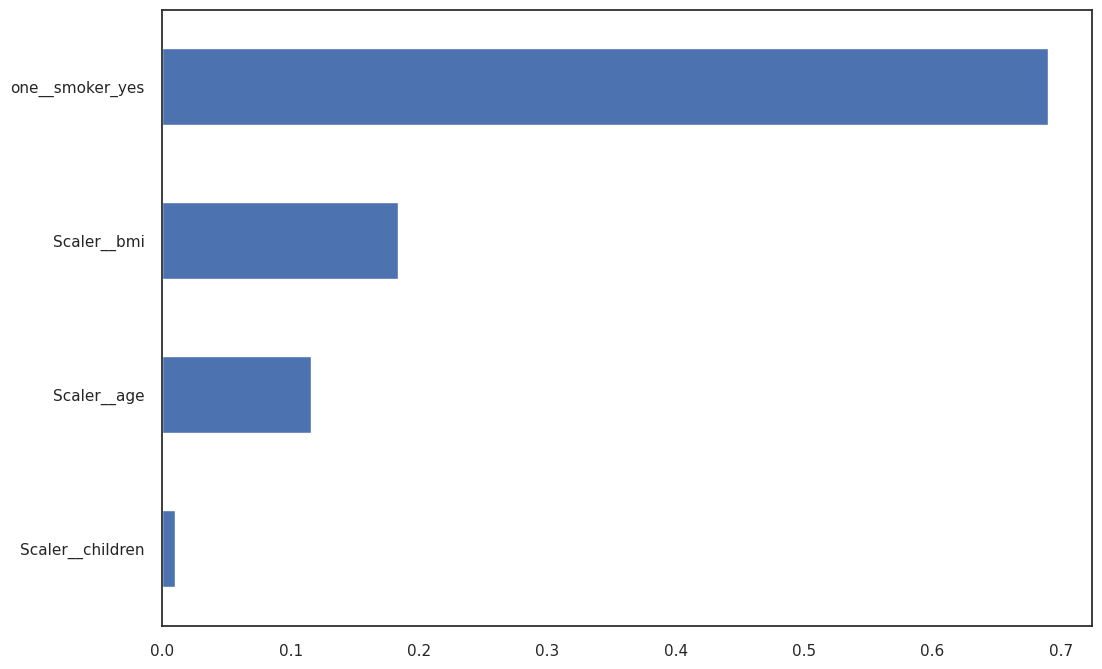

In [171]:
important_features = pd.Series(
    data=pipeline.named_steps['model'].feature_importances_,
    index=pipeline.named_steps['pre_processing'].get_feature_names_out()
)
important_features.sort_values().plot.barh()

### Modeling:

#### Treinando o modelo:

In [172]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(transformers=[('one',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['smoker']),
                                                 ('Scaler',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.01, n_estimators=400,
                                           subsample=0.8))])

In [173]:
y_pred = pipeline.predict(X=x_test)

In [174]:
pipeline.score(x_test, y_test)

0.8459311903804365

#### Avaliação do Modelo:

In [175]:
health_insurance.get_metrics(
    y_true=y_test,
    y_pred=y_pred
)

{'R2': 0.8459311903804365,
 'MAE': 2727.578847081391,
 'MAPE': 0.3163857433198931,
 'RMSE': 5121.335868927841}

### Deployment: 

In [176]:
path = r'../models/model.pkl' 

with open(path, 'wb') as file:
    pickle.dump(pipeline, file)